###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2016 A.A. Kulkarni

## "We need to be appreciated more than ever" - PDE's

   Some may say our prevalence and importance is only to the world of engineering and physics. But have you lately checked out the advances in [biology](https://www.birs.ca/workshops/2015/15w5072/report15w5072.pdf), [economics](http://www.princeton.edu/~moll/PDE_macro.pdf) and real-time stock trading?
<img style="float: right;" src="tumblr_why.jpg" width="350" height="300" >

Engineers working on a new Bentley, analysts crunching numbers at the New York stock exchange to scientists studying motion of miniscule droplets on a leaf to the formation of gigantic galaxies all rely on PDE's. 

Credit to Dr Barba and her group, we have had fun with some interesting ordinary and partial differential equations. Right from Module 1 the wheels in our head are turning, and to keep up with that, I asked myself a question, 







#### *** Is there a equation which is at the forefront of not one but many distinct fields? ***

## Hello Fisher Kolmogorov equation!

A non-linear reaction-diffusion equation by nature, its use can be seen from the fields of ecology, combustion, crystallization, plasma and adavantageous gene travel [1].
$$ \frac {\partial u}{\partial t} - D \frac{\partial^2 u}{\partial^2 x} = f(u)$$
Let's take a look at what the equation is built up of,

1. It's a 2nd order in space
2. It's a 1st order in time
3. Composed of one non-linear term - represents kinetics

Such equations where reaction kinetics and diffusion are coupled can affect the studied phenomenon faster than the standard diffusion equation. To study some interesting cases, lets start by importing the libraries ...


In [1]:
import numpy
from matplotlib import pyplot
import math
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] =16

from matplotlib import animation
from IPython.display import HTML

## Case 1: Propagation of a Mutant Gene

Let us imagine a population of individuals that have a mutant gene with concentration $u$ and a concentration of parent gene to be $1-u$. The individuals in this town diffuse by interacting with each other and having offsprings. Fisher and Kolmogorov (1937) simultaneously came up with a model to describe the spread of this mutation in some or a group of individuals at a specified spatial location through diffusion and natural selection, 

$$ u_t =D u_{xx} + \alpha u(1-u)$$  
where, D is the measure of how fast the individuals carrying the gene spread, $\alpha u(1-u)$ represents the kinetics and $\alpha$ models the utility of a gene growth rate of population with gene -- $\alpha$ > 0 = advantageous gene while $\alpha$ < 0 = disadvantageous gene
Lets look at the initial and boundary conditions,

\begin{equation}
u(x,0)=\begin{cases}1 & \text{where } -10\leq x \leq -9,\\
0 & \text{everywhere else in } (-10, 10)
\end{cases}
\end{equation}

$$ u(x,0) = u_o$$

Neumann B.C is imposed, which implies that no individuals with the gene leave or enter the shoreline

$$ \frac {\partial{u}}{ \partial{n}} = 0 $$

Thus the discretized equation becomes,
$$ \frac{u_i^{n+1} - u_i^{n}}{\Delta t} = \frac{u_{i+1}^{n} - 2u_i^{n} + u_{i-1}^n}{\Delta x^2} + \alpha u_i^n(1-u_i^n)$$

So now we already have one inital condition, thus the only unknown is $u_i^{n+1} $ and re-arranging the above equation to get this term on the LHS, we get

$$ u_i^{n+1} = \frac{\Delta t }{\Delta x^2} (u_{i+1}^{n} - 2u_i^{n} + u_{i-1}^n) + \Delta t \alpha u_i^n(1-u_i^n) +u_i^n$$ 

In [2]:
nx =101
dx =0.1
dt =0.001
nt = [0,250,1000,2500,6000]
x = numpy.linspace(-10,10,nx)
D =1
alpha = 1
uo = numpy.zeros(nx)
lbound = numpy.where(x <= -9)
ubound = numpy.where(x >= -10)            
bounds = numpy.intersect1d(lbound, ubound)
uo[bounds]=1                #Initial waveform

In [3]:
def CatchtheFisherwave(u,nt,dt,dx):
    
    """Solve the non - linear Fisher Kolmogorov equation.
    
    Solves the Fisher equation where 
    * the diffusion constant is set to 1
    * the domain is x \in [-10, 10]
    * An array of timestep from 0 to 2000 are taken, with \Delta t = 0.001
    * the initial data is described in above
    
    Parameters
    ----------
    u  : Initial waveform
    nt : int - number of time steps
    dt : step in temporal scale
    dx : step in x direction
        
    Returns
    -------
    u = Concentration of mutant gene that has affected the population
        1 = entire population over the area has the gene
        0 = entire population over the area does not have the gene
    
    """
    
    un= numpy.zeros_like(u)
    for n in range (nt):
        un= numpy.copy(u)
        u[1:-1] = un[1:-1] \
                + D * dt/dx**2 * (un[2:] - 2*un[1:-1] + un[0:-2]) \
                + alpha * un[1:-1] * dt * (1 - un[1:-1])
                
        u[0] = u[1] 
        u[-1] = u[-2]
        
    return u

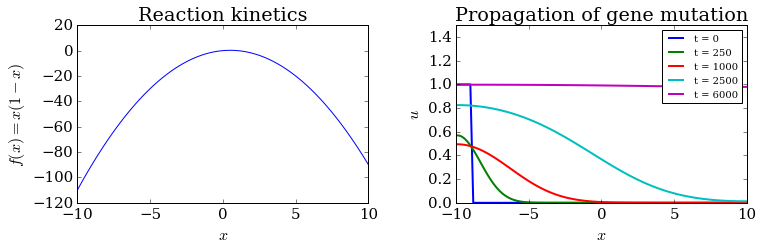

In [4]:
%run subplot.py
sub1.plot(x,x*(1-x))
for n in nt:
    u = CatchtheFisherwave(uo,n,dt,dx)
    sub2.plot(x,u,lw=2, label='t = %s' %n)
    pyplot.legend(prop={'size':10})
pyplot.show()

In [5]:
%run Animate_func.py
HTML(anim.to_html5_video())

## References: ##

1. https://en.wikipedia.org/wiki/Fisher's_equation
2. R. A. Fisher, The wave of advance of advantageous genes, Ann. Eugenics 7 (1937), 353369.
3. A. Kolmogorov, I. G. Petrovskii, and N. S. Piskunov, A study of the diffusion equation with increase in the amount of substance, and its application to a biological problem.(translated from Bull. Moscow Univ., Math. Mech. 1, (1937) 1–25).
3. Chicone, Carmen. An Invitation to Applied Mathematics Differential Equations, Modeling, and Computation. N.p.: Academic Pr, 2016. Print
4. Murray, J. D. "Biological Waves: Single-Species Models." Mathematical Biology: I. An Introduction. New York, NY: Springer New York, 2004. N. pag. Print.


###### Cell below loads the style for the notebook

In [6]:
from IPython.core.display import HTML
css_file = 'numericalmoocstyle.css'
HTML(open(css_file, "r").read())